In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../../data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [37]:
train = df[:-4].copy()
test = df[-4:].copy()

In [38]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
def visualize_forecast(train, test, x_col, y_col, y_forecast, ylabel, xticks):
    
    fig, ax = plt.subplots()
    ax.plot(train[x_col], train[y_col], 'g-.', label='Train')
    ax.plot(test[x_col], test[y_col], 'b-', label='Test')

    ax.plot(test[x_col], test[y_forecast], 'r--', label='Predicted')
    ax.set_xlabel(x_col)
    ax.set_ylabel(ylabel)

    init = train.shape[0]
    length = test.shape[0]
    ax.axvspan(init, init + length - 1, color='#808080', alpha=0.2)
    ax.legend()
    plt.xticks(*xticks)
    fig.autofmt_xdate()
    plt.tight_layout()

historical_mean: 4.308499987499999
mape_hist_mean: 70.00752579965119


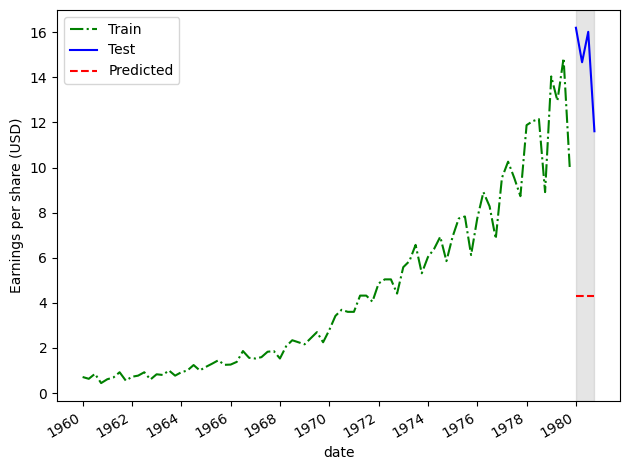

In [59]:
# Implementing the historical mean baseline

historical_mean = train['data'].mean()
print("historical_mean:", historical_mean)

test.loc[:, 'pred_mean'] = historical_mean

mape_hist_mean = mape(test['data'], test['pred_mean'])
print("mape_hist_mean:", mape_hist_mean)

kwargs = {
    "train": train,
    "test": test,
    "x_col": 'date',
    "y_col": 'data',
    "y_forecast": 'pred_mean',
    "ylabel": 'Earnings per share (USD)',
    "xticks": (np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]),
}
visualize_forecast(**kwargs)

last_year_mean: 12.96
mape_last_year_mean: 15.5963680725103


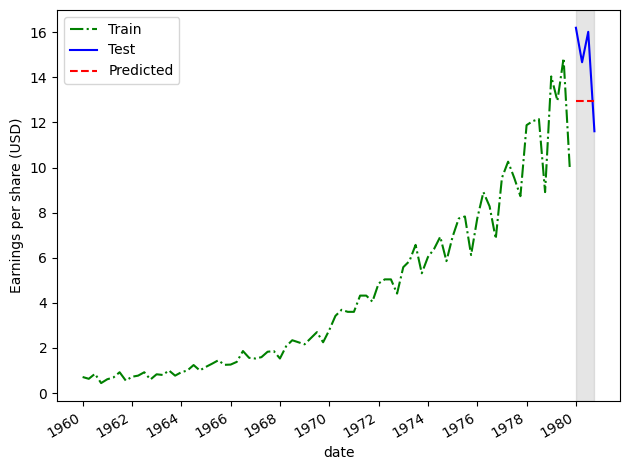

In [60]:
# Implementing last year’s mean

last_year_mean = train.data[-4:].mean()
print("last_year_mean:", last_year_mean)

test.loc[:, 'pred_mean'] = last_year_mean

mape_last_year_mean = mape(test['data'], test['pred_mean'])
print("mape_last_year_mean:", mape_last_year_mean)

kwargs = {
    "train": train,
    "test": test,
    "x_col": 'date',
    "y_col": 'data',
    "y_forecast": 'pred_mean',
    "ylabel": 'Earnings per share (USD)',
    "xticks": (np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]),
}
visualize_forecast(**kwargs)

last_value: 9.99
mape_last_value_mean: 30.457277908606535


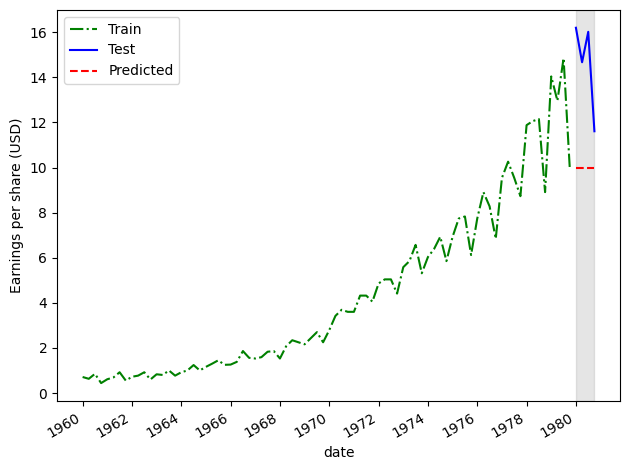

In [61]:
# Implementing last known value

last_value = train.data.iloc[-1]
print("last_value:", last_value)

test.loc[:, 'pred_mean'] = last_value

mape_last_value_mean = mape(test['data'], test['pred_mean'])
print("mape_last_value_mean:", mape_last_value_mean)

kwargs = {
    "train": train,
    "test": test,
    "x_col": 'date',
    "y_col": 'data',
    "y_forecast": 'pred_mean',
    "ylabel": 'Earnings per share (USD)',
    "xticks": (np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]),
}
visualize_forecast(**kwargs)

In [56]:
train.data[-4:].values

array([14.04, 12.96, 14.85,  9.99])

last_seasonal: [14.04 12.96 14.85  9.99]
mape_last_seasonal_mean: 11.561658552433654


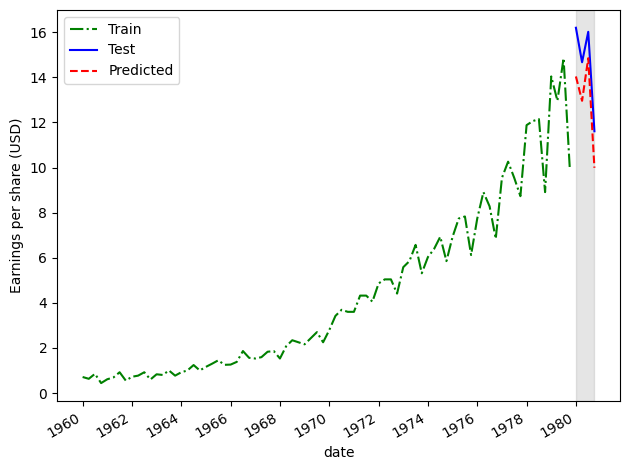

In [62]:
# Implementing last known value

last_seasonal = train.data[-4:].values
print("last_seasonal:", last_seasonal)

test.loc[:, 'pred'] = last_seasonal

mape_last_seasonal_mean = mape(test['data'], test['pred'])
print("mape_last_seasonal_mean:", mape_last_seasonal_mean)

kwargs = {
    "train": train,
    "test": test,
    "x_col": 'date',
    "y_col": 'data',
    "y_forecast": 'pred',
    "ylabel": 'Earnings per share (USD)',
    "xticks": (np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980]),
}
visualize_forecast(**kwargs)

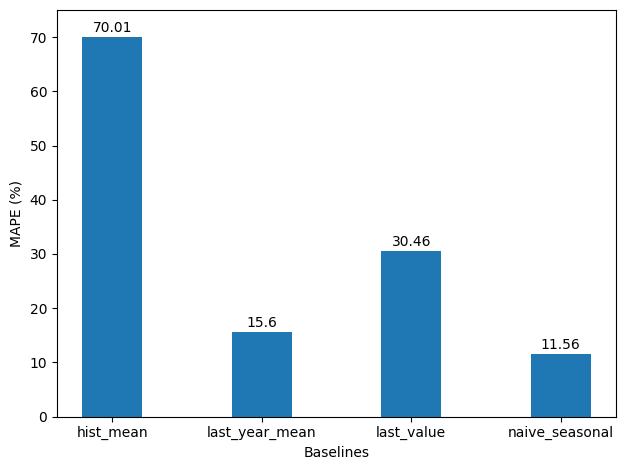

In [76]:
# Compare

fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last_value', 'naive_seasonal']
y = [
    round(mape_hist_mean, 2),
    round(mape_last_year_mean, 2),
    round(mape_last_value_mean, 2),
    round(mape_last_seasonal_mean, 2),
]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()
plt.show()